<a href="https://colab.research.google.com/github/evroth/gsb545repo/blob/main/Lab6_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Classify Diabetes with Neural Networks in Keras

For this lab we will be using data from the Centers for Disease Control and Prevention (CDC), and in particular the Behavioral Risk Factor Surveillance System (BRFSS) to predict diabetes. Diabetes in the dataset is binary, an observation either has it or does not.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## The Data

In [2]:
db = pd.read_csv("diabetes.csv")

In [3]:
db.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [4]:
db.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
132475,1.0,1.0,0.0,1.0,36.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,12.0,6.0,7.0
199380,1.0,0.0,1.0,1.0,25.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,0.0,14.0,0.0,1.0,8.0,6.0,2.0
245430,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,6.0,6.0
91186,1.0,1.0,1.0,1.0,36.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,1.0,0.0,0.0,1.0,9.0,6.0,7.0
238546,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0


In [5]:
db.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## EDA

In [9]:
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include='number').columns
    num_plots = len(numeric_cols)
    num_cols = 3  # Number of columns in the plot grid
    num_rows = (num_plots - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.ravel()  # Flatten the 2D axes array

    for i, col in enumerate(numeric_cols):
        axes[i].hist(df[col], bins='auto')
        axes[i].set_title(col)

    # Hide extra subplots if there are any
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

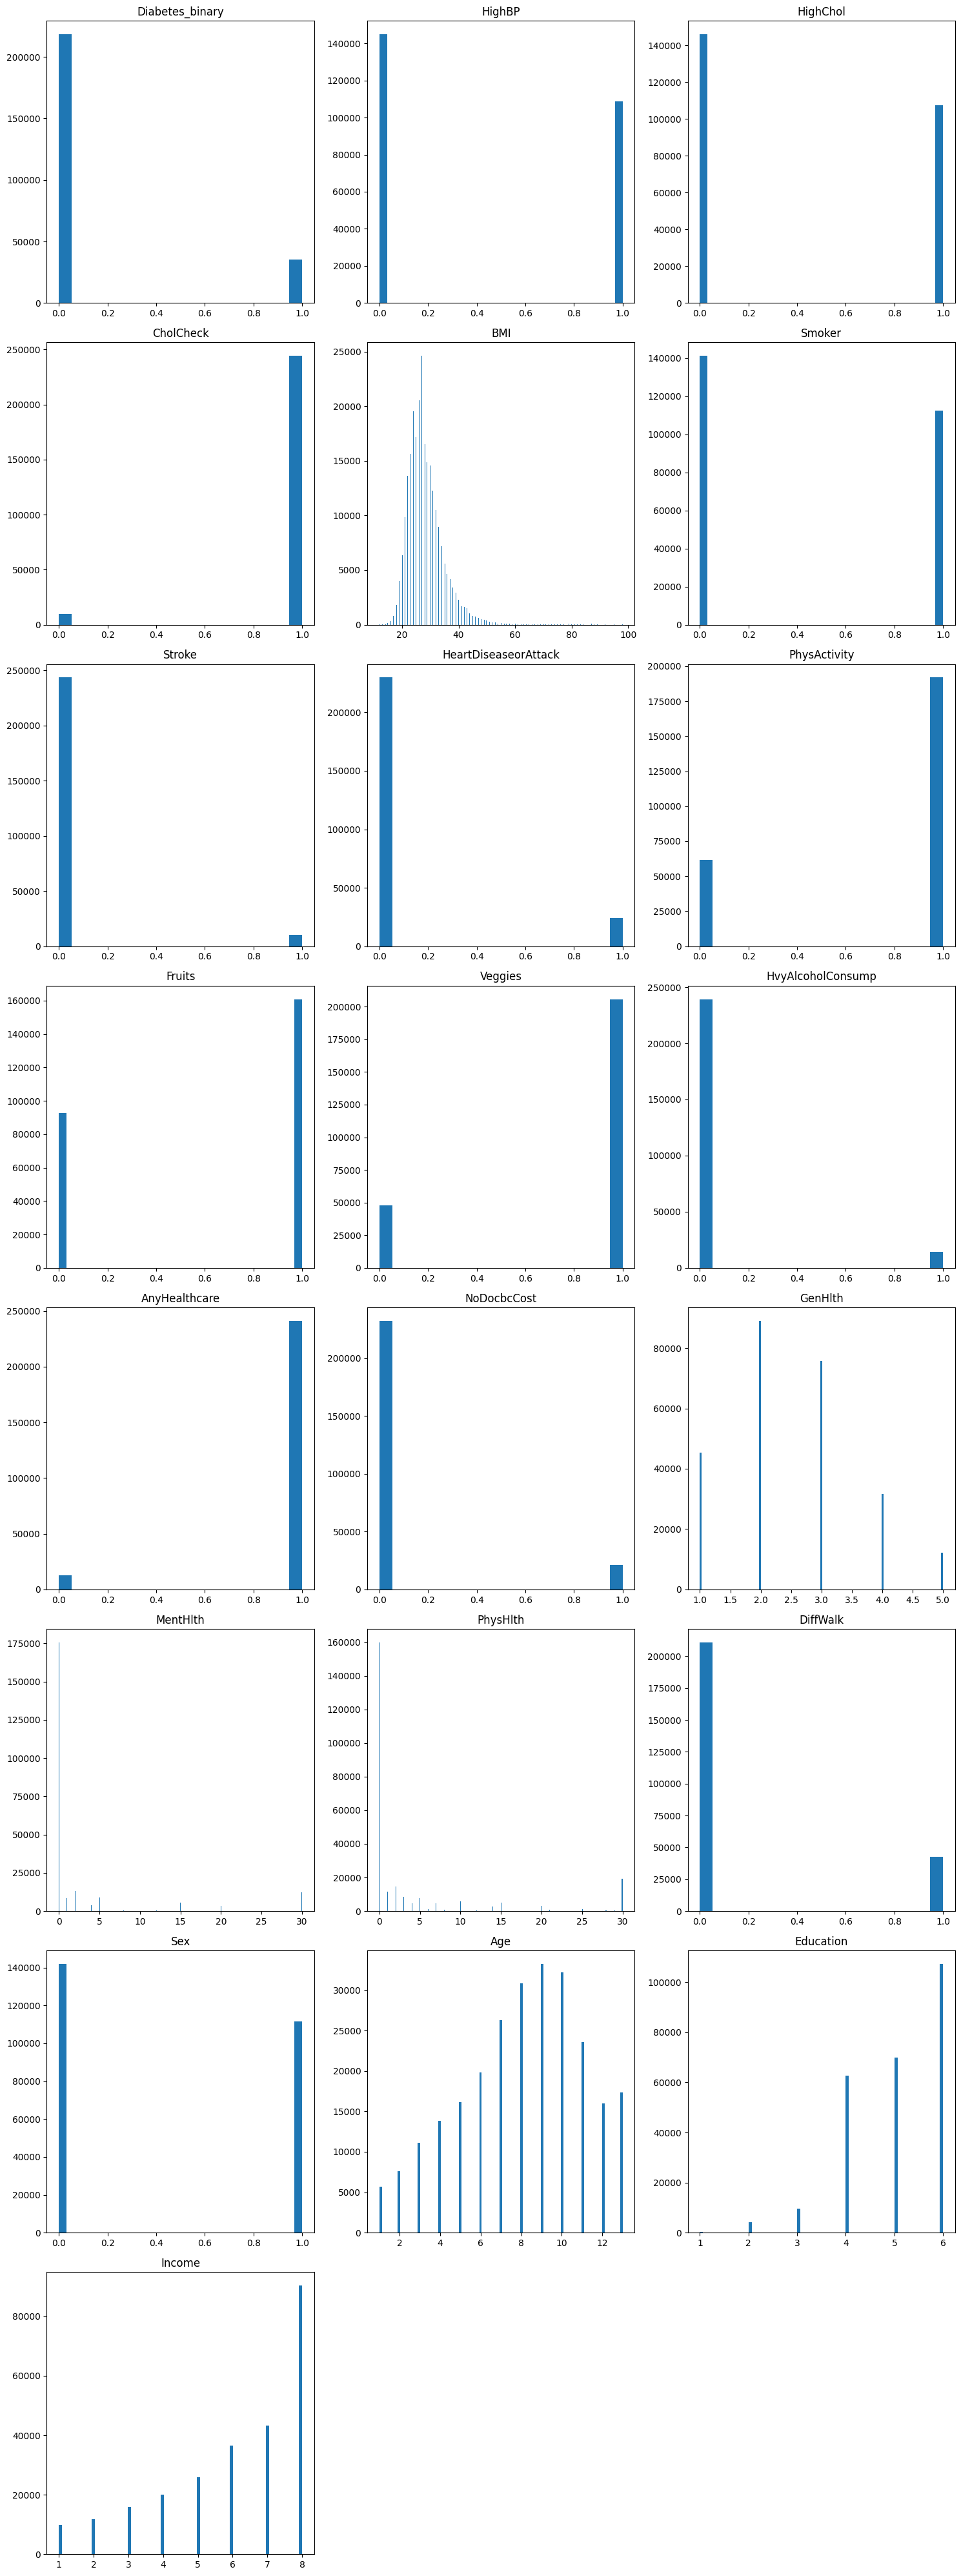

In [10]:
plot_histograms(db)

There is a large imbalance in the outcome variable and many of the predictor vairables. It will be imoportant to take this into account and use measures of fit like precision, recall, or roc auc. It may also be beneficial to do modify the sampling so the variables that are infrequent apear slightly more than normal.

## Preprocessing

There isn't really a ton that needs to be done for preprossing with this data, it is in a good form with dummy variables and such.

## Building Models

In [12]:
# Separate features and target variable
X = db.drop(['Diabetes_binary'], axis=1)
y = db['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model 1**

In [27]:
X = db.drop("Diabetes_binary", axis=1)  # Features
y = db["Diabetes_binary"]  # Target variable

# Perform one-hot encoding for categorical variables if needed
X = pd.get_dummies(X)

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Model Specs
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile and Trian
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
6342/6342 [==============================] - 20s 3ms/step - loss: 0.3183 - accuracy: 0.8644 - precision_3: 0.5596 - recall_3: 0.1361 - auc_3: 0.8213
Epoch 2/10
6342/6342 [==============================] - 17s 3ms/step - loss: 0.3142 - accuracy: 0.8659 - precision_3: 0.5751 - recall_3: 0.1520 - auc_3: 0.8274
Epoch 3/10
6342/6342 [==============================] - 17s 3ms/step - loss: 0.3135 - accuracy: 0.8664 - precision_3: 0.5795 - recall_3: 0.1587 - auc_3: 0.8282
Epoch 4/10
6342/6342 [==============================] - 17s 3ms/step - loss: 0.3129 - accuracy: 0.8666 - precision_3: 0.5827 - recall_3: 0.1577 - auc_3: 0.8292
Epoch 5/10
6342/6342 [==============================] - 16s 3ms/step - loss: 0.3125 - accuracy: 0.8667 - precision_3: 0.5862 - recall_3: 0.1564 - auc_3: 0.8297
Epoch 6/10
6342/6342 [==============================] - 17s 3ms/step - loss: 0.3121 - accuracy: 0.8671 - precision_3: 0.5902 - recall_3: 0.1589 - auc_3: 0.8302
Epoch 7/10
6342/6342 [==================

Model 1 here has decent ROC AUC. Unfortunatly it does not have a very good recall, which is probably pretty important for this type of task. Recall is important here because we want to be able to identify the positive cases as best as we can in order to prevent/treat disease. A low recall may mean we are not doing great at this.

More models should be explored to imporove these measures of fit.

**Model 2**

In [28]:
# Build Model Specs
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile and Trian
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=42)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
4832/4832 [==============================] - 13s 2ms/step - loss: 0.3186 - accuracy: 0.8643 - precision_4: 0.5567 - recall_4: 0.1417 - auc_4: 0.8207
Epoch 2/10
4832/4832 [==============================] - 12s 3ms/step - loss: 0.3142 - accuracy: 0.8659 - precision_4: 0.5775 - recall_4: 0.1502 - auc_4: 0.8275
Epoch 3/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3135 - accuracy: 0.8668 - precision_4: 0.5892 - recall_4: 0.1523 - auc_4: 0.8283
Epoch 4/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3130 - accuracy: 0.8665 - precision_4: 0.5851 - recall_4: 0.1535 - auc_4: 0.8290
Epoch 5/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3128 - accuracy: 0.8664 - precision_4: 0.5826 - recall_4: 0.1538 - auc_4: 0.8295
Epoch 6/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3124 - accuracy: 0.8670 - precision_4: 0.5906 - recall_4: 0.1572 - auc_4: 0.8299
Epoch 7/10
4832/4832 [==================

With this model, Model 2, we were able to bump the recall up by .03 while maintaining accuracy and AUC. It came at the sacrifice of .01 precision but for this situation, I think that is a good sacrifice.

**Model 3**

In [29]:
# Build Model Specs
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile and Trian
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=42)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
4832/4832 [==============================] - 13s 2ms/step - loss: 0.3192 - accuracy: 0.8638 - precision_5: 0.5452 - recall_5: 0.1519 - auc_5: 0.8202
Epoch 2/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3154 - accuracy: 0.8654 - precision_5: 0.5641 - recall_5: 0.1591 - auc_5: 0.8258
Epoch 3/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3148 - accuracy: 0.8659 - precision_5: 0.5712 - recall_5: 0.1611 - auc_5: 0.8267
Epoch 4/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3147 - accuracy: 0.8659 - precision_5: 0.5699 - recall_5: 0.1641 - auc_5: 0.8270
Epoch 5/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3145 - accuracy: 0.8661 - precision_5: 0.5718 - recall_5: 0.1642 - auc_5: 0.8271
Epoch 6/10
4832/4832 [==============================] - 10s 2ms/step - loss: 0.3145 - accuracy: 0.8662 - precision_5: 0.5737 - recall_5: 0.1633 - auc_5: 0.8271
Epoch 7/10
4832/4832 [==================

Changing the optimizer to RMSprop did not improve the model.

**Model 4**

In [31]:
# Build Model Specs
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile and Trian
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=42)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3283 - accuracy: 0.8624 - precision_7: 0.5325 - recall_7: 0.1222 - auc_7: 0.8054
Epoch 2/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3164 - accuracy: 0.8650 - precision_7: 0.5664 - recall_7: 0.1428 - auc_7: 0.8242
Epoch 3/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3151 - accuracy: 0.8656 - precision_7: 0.5742 - recall_7: 0.1470 - auc_7: 0.8261
Epoch 4/10
4832/4832 [==============================] - 10s 2ms/step - loss: 0.3143 - accuracy: 0.8661 - precision_7: 0.5801 - recall_7: 0.1492 - auc_7: 0.8273
Epoch 5/10
4832/4832 [==============================] - 10s 2ms/step - loss: 0.3138 - accuracy: 0.8661 - precision_7: 0.5805 - recall_7: 0.1494 - auc_7: 0.8279
Epoch 6/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3135 - accuracy: 0.8662 - precision_7: 0.5820 - recall_7: 0.1484 - auc_7: 0.8284
Epoch 7/10
4832/4832 [==================

Changing optimizer to 'SGD' also did not really improve the model compared to Model 2.

**Model 5**

In [32]:
from tensorflow.keras.layers import LeakyReLU

activation = LeakyReLU(alpha=0.2)  # alpha is the slope for negative inputs

In [33]:
# Build Model Specs
model = Sequential()
model.add(Dense(100, activation=activation,input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile and Trian
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=42)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
4832/4832 [==============================] - 14s 3ms/step - loss: 0.3192 - accuracy: 0.8637 - precision_8: 0.5442 - recall_8: 0.1493 - auc_8: 0.8200
Epoch 2/10
4832/4832 [==============================] - 12s 3ms/step - loss: 0.3145 - accuracy: 0.8658 - precision_8: 0.5746 - recall_8: 0.1520 - auc_8: 0.8269
Epoch 3/10
4832/4832 [==============================] - 12s 3ms/step - loss: 0.3138 - accuracy: 0.8664 - precision_8: 0.5826 - recall_8: 0.1547 - auc_8: 0.8279
Epoch 4/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3133 - accuracy: 0.8662 - precision_8: 0.5798 - recall_8: 0.1542 - auc_8: 0.8286
Epoch 5/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3131 - accuracy: 0.8661 - precision_8: 0.5764 - recall_8: 0.1561 - auc_8: 0.8289
Epoch 6/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3129 - accuracy: 0.8666 - precision_8: 0.5839 - recall_8: 0.1573 - auc_8: 0.8292
Epoch 7/10
4832/4832 [==================

Here in Model 5, we try to beat Mod 2 by using LeakyRelu as our activiation function for our first and only hidden layer.

It made the model much worse in terms of recall. Not good

**Model 6**

In [34]:
# Build Model Specs
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='softmax'))

# Compile and Trian
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=42)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3273 - accuracy: 0.1397 - precision_9: 0.1397 - recall_9: 1.0000 - auc_9: 0.5000
Epoch 2/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3168 - accuracy: 0.1397 - precision_9: 0.1397 - recall_9: 1.0000 - auc_9: 0.5000
Epoch 3/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3155 - accuracy: 0.1397 - precision_9: 0.1397 - recall_9: 1.0000 - auc_9: 0.5000
Epoch 4/10
4832/4832 [==============================] - 11s 2ms/step - loss: 0.3147 - accuracy: 0.1397 - precision_9: 0.1397 - recall_9: 1.0000 - auc_9: 0.5000
Epoch 5/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3144 - accuracy: 0.1397 - precision_9: 0.1397 - recall_9: 1.0000 - auc_9: 0.5000
Epoch 6/10
4832/4832 [==============================] - 12s 2ms/step - loss: 0.3139 - accuracy: 0.1397 - precision_9: 0.1397 - recall_9: 1.0000 - auc_9: 0.5000
Epoch 7/10
4832/4832 [==================

This model is funny because I am pretty sure that it is just classifying everything as being positive for diabetes pretty much. The perfect recall suggests that and the .5 AUC says it is just as good as random. Definetly not the best model but it is fun to see

**Model 7: XGBoost** 

In [36]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [37]:
# define the model
model = XGBClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X_scaled, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('ROC Area Under Curve: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC Area Under Curve: 0.827 (0.001)


this is about the same AUC we got from the NN models.

In [38]:
# define the model
model = XGBClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X_scaled, y, scoring='recall', cv=cv, n_jobs=-1)
# report performance
print('Recall: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Recall: 0.172 (0.002)


I hate to say it but the NN built in Model 2 with Keras actually is outperforming this basic XGBoost which has not always been the case with NN.

**Model 8**

One last tweak with the number of hidden units to see if Model 2 can be beat.

In [39]:
# Build Model Specs
model = Sequential()
model.add(Dense(52, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile and Trian
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=42)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
4832/4832 [==============================] - 15s 3ms/step - loss: 0.3219 - accuracy: 0.8623 - precision_10: 0.5260 - recall_10: 0.1433 - auc_10: 0.8164
Epoch 2/10
4832/4832 [==============================] - 16s 3ms/step - loss: 0.3143 - accuracy: 0.8655 - precision_10: 0.5705 - recall_10: 0.1511 - auc_10: 0.8272
Epoch 3/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3137 - accuracy: 0.8659 - precision_10: 0.5772 - recall_10: 0.1507 - auc_10: 0.8281
Epoch 4/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3131 - accuracy: 0.8665 - precision_10: 0.5857 - recall_10: 0.1523 - auc_10: 0.8288
Epoch 5/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3128 - accuracy: 0.8667 - precision_10: 0.5871 - recall_10: 0.1544 - auc_10: 0.8294
Epoch 6/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3126 - accuracy: 0.8665 - precision_10: 0.5825 - recall_10: 0.1565 - auc_10: 0.8297
Epoch 7/10
4832/4832 [

Dropping lower than 100 lead to worse performance in terms of recall, but there were solid gains in terms of percision

**Model 9**

In [40]:
# Build Model Specs
model = Sequential()
model.add(Dense(150, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compile and Trian
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=10, batch_size=42)

# Evaluate Model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Epoch 1/10
4832/4832 [==============================] - 14s 3ms/step - loss: 0.3178 - accuracy: 0.8645 - precision_11: 0.5563 - recall_11: 0.1485 - auc_11: 0.8220
Epoch 2/10
4832/4832 [==============================] - 12s 3ms/step - loss: 0.3140 - accuracy: 0.8661 - precision_11: 0.5777 - recall_11: 0.1532 - auc_11: 0.8277
Epoch 3/10
4832/4832 [==============================] - 12s 3ms/step - loss: 0.3133 - accuracy: 0.8665 - precision_11: 0.5823 - recall_11: 0.1562 - auc_11: 0.8285
Epoch 4/10
4832/4832 [==============================] - 12s 3ms/step - loss: 0.3128 - accuracy: 0.8670 - precision_11: 0.5874 - recall_11: 0.1605 - auc_11: 0.8294
Epoch 5/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3124 - accuracy: 0.8664 - precision_11: 0.5786 - recall_11: 0.1612 - auc_11: 0.8299
Epoch 6/10
4832/4832 [==============================] - 13s 3ms/step - loss: 0.3122 - accuracy: 0.8668 - precision_11: 0.5838 - recall_11: 0.1607 - auc_11: 0.8303
Epoch 7/10
4832/4832 [

This model also fell short of Model 2's performance

## Conclusion

In my opinion, the best model I was able to create was Model 2. It's performance measures were:

Accuracy: 0.87

Precision: 0.56

Recall: 0.18

AUC: 0.83


I think what made this model the best was its higher recall. It may have not had the highest precision, but I think false positives are better to have than missing a case. Especially with the case of diabetes where treatement may just be eat better and exercise, which they should be doing anyways.

if that higher precision was what you were looking for, then Model 8 may be for you.

It could be an interesting avenue to address the imbalances in the dataset differently, perhaps throught different sampling techniques. I will be sure to do more research and identify a possibly winning strategy to help create the best classification model.